# The Variation Theorem

The preceding notebooks have considered analytically solvable model problems that culminated in the hydrogenic atom problem. For other, more complicated problems, it will not be possible, in general, to find exact analytic solutions to the time-independent Schrödinger equation. As such, this notebook describes one strategy to find approximate solutions to the Schrödinger equation using the variation theorem. 

## The Variation Theorem

Consider a system with a time-independent Hamiltonian, $\hat{H},$ and energy, $E_1$. The variation theorem states that, if $\phi$ is any well-behaved function that satisfies the boundary conditions for the system, then the expectation value of $\hat{H}$ with respect to $\phi$ is guaranteed to be an upper-bound to $E_1,$ i.e.,

$$\begin{align}
\frac{\langle \phi | \hat{H} | \phi\rangle}{\langle \phi| \phi\rangle} \ge E_1
\end{align}$$

If $\phi$ is normalized, then we have

$$\begin{align}
\langle \phi | \hat{H} | \phi\rangle \ge E_1
\end{align}$$

**Proof**. Let us expand $\phi$ in the basis of eigenfunctions of $\hat{H},$ which form a complete set, which we can choose to be orthonormal. We have

$$\begin{align}
|\phi\rangle = \sum_k c_k |\psi_k\rangle
\end{align}$$

where

$$\begin{align}
\hat{H} | \psi_k \rangle = E_k | \psi_k \rangle
\end{align}$$

$\phi$ is chosen to be normalized, which leads to 

$$\begin{align}
\sum_k |c_k|^2 = 1
\end{align}$$

We take the expectation value of $\hat{H}$ with respect to $\phi,$ which we will call $W$

$$\begin{align}
W &= \langle \phi | \hat{H} | \phi \rangle \\
&= \sum_{kl} c_k^* c_l \langle \psi_k | \hat{H} | \psi_l \rangle \\
&= \sum_{kl} c_k^* c_l E_l \langle \psi_k | \psi_l \rangle \\
&= \sum_{kl} c_k^* c_l E_l \delta_{kl} \\
&= \sum_k |c_k|^2 E_k
\end{align}$$

Now, by definition, $E_k \ge E_1$ for all $k$ because $E_1$ is the ground-state energy. As a result, we can state that

$$\begin{align}
|c_k|^2 E_k \ge |c_k|^2 E_1
\end{align}$$

Combining this result with the expectation value evaluated above leads to 

$$\begin{align}
W &= \sum_k |c_k|^2 E_k \\
  &\ge \sum_k |c_k|^2 E_1 = E_1
\end{align}$$

Therefore,

$$\begin{align}
W = \langle \phi | \hat{H} | \phi \rangle \ge E_1
\end{align}$$

This result has important consequences for finding approximate solutions to the Schrödinger equation. First, we could simply test a set of trial functions to see which one is the "best" in the sense that it gives the lowest energy (the closest to $E_1$). Alternatively, we could choose a single trial function that contains parameters, and the best set of parameters could be chosen by varying them such that they minimize the expectation value of the Hamiltonian. In either case, we need to start with a good trial function.

As an example, consider the one-dimensional particle-in-a-box (PIB) problem. We have a potential defined by

$$\begin{align}
V(x) = \begin{cases}
\infty\text{, } &x < 0 \\
0\text{, } & 0 \le x \le L \\
\infty\text{, } & x \ge L 
\end{cases}
\end{align}$$

As such, we know that the boundary conditions for the problem require that the wave function go to zero at the edges of the box. The following trial wave function satisfies these conditions

$$\begin{align}
\phi(x) = \begin{cases}
0\text{, } &x < 0 \\
x(L-x)\text{, } &0 \le x \le L \\
0\text{, }&x \ge L 
\end{cases}
\end{align}$$

The following Python code visualizes this trial function alongside the actual ground-state wave function for the PIB problem

$$\begin{align}
\psi_1(x) = \begin{cases}
0\text{, } &x < 0 \\
\left (\frac{2}{L} \right ) ^{1/2}\sin\left (\frac{\pi x}{L}\right )\text{, } &0 \le x \le L \\
0\text{, }&x \ge L 
\end{cases}
\end{align}$$

The code also evaluates the expecation value of the Hamiltonian with respect to $\phi$. To simplify matters, we will work in atomic units. We choose the mass of the particle to be that of an electron ($m = m_\text{e} = 1$), and the length of the box to be $L = 1 a_0$. Because

$$\begin{align}
\langle \phi | \hat{H} | \phi \rangle = -\frac{\hbar^2}{2m}  \left \langle \phi \left | \frac{d^2}{dx^2}\right | \phi \right \rangle
\end{align}$$

we will also need to know the second derivative of $\phi$ with respect to $x$

$$\begin{align}
\frac{d^2}{dx^2} \phi(x) &= \frac{d^2}{dx^2} x(L-x) \\
&= \frac{d}{dx} (L - 2x) \\
&= -2
\end{align}$$

The code below will also normalize $\phi(x),$ so we need to remember to include the normalization constant in this derivative expression.

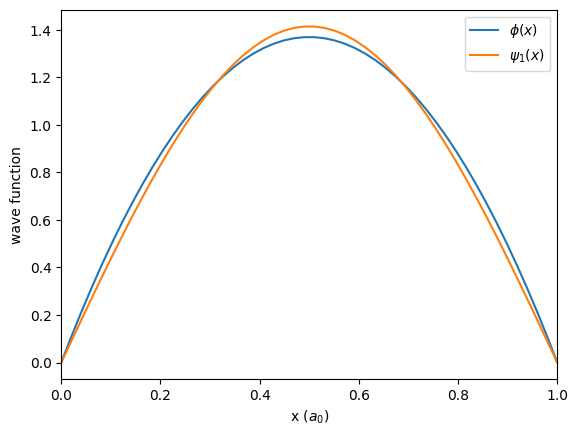

W =     4.9979 Eh


In [25]:
import numpy as np
import matplotlib.pyplot as plt

m = 1
L = 1
hbar = 1

x = np.linspace(0, L)
phi = x * (L-x)
psi_1 = np.sqrt(2.0 / L) * np.sin(np.pi * x / L)

# normalize phi 
# phi -> N * phi
# N = 1/sqrt(<phi|phi>)
N = 1.0 / np.sqrt(np.trapz(phi**2, x))
phi *= N

fig = plt.figure()

plt.xlim(0, L)
plt.xlabel(r'x ($a_0$)')
plt.ylabel(r'wave function')

plt.plot(x, phi, label = r'$\phi(x)$')
plt.plot(x, psi_1, label = r'$\psi_1(x)$')
plt.legend()
plt.show()

# evaluate <phi|H|phi> = -1/2<phi|d^2/dx^2|phi> = <phi|N>
# (don't forget the factor of N)
W = N * np.trapz(phi, x)

print('W = %10.4f Eh' % (W / np.trapz(phi**2, x)))


How does this result compare to the true ground-state energy for the PIB problem? Recall

$$\begin{align}
E_n = \frac{\hbar^2n^2\pi^2}{2mL^2} 
\end{align}$$

so 

$$\begin{align}
E_1 =  \frac{\pi^2}{2} {\rm E}_h \approx 4.9348 ~{\rm E}_h
\end{align}$$

Sure enough, the average energy associated with the trial wave function is larger than the exact ground-state energy, by about 1.3\%.